# Data Extract and Transform Process

In [1]:
# import statements
import pandas as pd
from  datetime import datetime

### Cleaning the Comments Dataset

In [34]:
# read comments data
comments = pd.read_json('trp_comments.json')

In [ ]:
comments.columns.unique()

In [35]:
# filter to relevant columns
comments = comments[['id', 'created_utc','user_removed', 'author', 'author_fullname', 'body']]

In [36]:
# set index to comment id
comments.set_index('id', inplace=True)

In [37]:
# Change from UNIX time to human-readable format
comments['datetime'] = pd.to_datetime(comments['created_utc'], infer_datetime_format=True, unit='s')


In [6]:
# figure out how many comments are removed to be used in future parsing
# if comment is removed, we will not use it for toxicity parsing

# number of comments that weren't removed
comments['user_removed'].isnull().sum()

189806

In [7]:
# total number of rows
len(comments['user_removed'])

200139

In [8]:
# calculate percentage of rows with no body data
# (num of comments that were removed / total comments) * 100
((200139-189806)/200139)*100

5.16291177631546

~5.17% of all comments in the dataset do not have text that can be parsed

In [9]:
# fill nulls with 0 to make column binary 
comments.fillna({'user_removed': 0}, inplace=True)

### Cleaning the Submissions Dataset

In [12]:
submissions = pd.read_json('trp_submissions.json')

In [13]:
# filter to relevant columns
submissions = submissions[['id', 'created_utc', 'author', 'selftext']]

In [14]:
# set submissions index
submissions.set_index('id', inplace=True)

In [15]:
submissions.head()

,created_utc,author,selftext
id,,,
8blq21,1523489914,Heathcliff--,Just fucking lift already.\n\nThe vast majorit...
8bl1d2,1523484118,timber_ghost,[removed]
8bknm0,1523481125,Leg_Of_Lamb,[removed]
8bkimw,1523480066,SexdictatorLucifer,"A long time ago, the human male decided to emb..."
8bk5r4,1523477234,stacysmomlovesme,I recently wrote how water fasting can improve...


In [16]:
# Change from UNIX time to human-readable format
submissions['datetime'] = pd.to_datetime(submissions['created_utc'], infer_datetime_format=True, unit='s')

In [17]:
# determine how many submissions were removed/no longer viewable
len(submissions[submissions['selftext']==('[removed]')])

3646

In [18]:
# number of rows
submissions.shape[0]

7118

3646 out of 7118 rows (~51%) have had their posts removed.

This is too large of a missing dataset.

# Data Sanity Check

Checking to see which months have missing data in the collection process

In [19]:
comments.groupby([comments['datetime'].dt.year, comments['datetime'].dt.month]).size()

datetime  datetime
2018      4           26678
          5           30311
          6           30677
          7           28616
          8           22791
          9           23387
          10          10862
          11           9774
          12          10935
2019      4            6108
dtype: int64

In [21]:
submissions.groupby([submissions['datetime'].dt.year, submissions['datetime'].dt.month]).size()

datetime  datetime
2018      3            833
          4            951
          5           1067
          6            976
          7           1071
          8            930
          9            870
2019      2            231
          4            189
dtype: int64

<AxesSubplot:xlabel='datetime,datetime'>

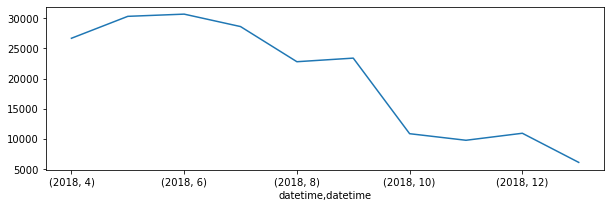

In [22]:
comments.groupby([comments['datetime'].dt.year, comments['datetime'].dt.month]).size().plot(figsize=(10,3))

<AxesSubplot:xlabel='datetime,datetime'>

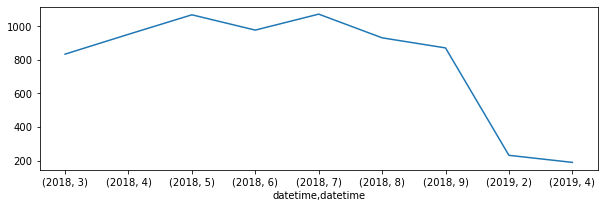

In [23]:
submissions.groupby([submissions['datetime'].dt.year, submissions['datetime'].dt.month]).size().plot(figsize=(10,3))

## Moving Forward

After conferring with the instructors, we have decided to only use the comments dataset filtered to the 120 day range corresponding to the 60 days before and after the quarantine intervention.

In [39]:
# Observing only the comments 60 days before and
# 60 days after 09/28/2018 (07/30/2018 - 11/27/2018) in the dataset.

date_range = (comments['datetime'] > '2018-07-30') & (comments['datetime'] < '2018-11-28')

In [40]:
# apply date filter to comments df
filtered_comments=comments[date_range]
filtered_comments.sort_values(by='datetime', inplace=True)

## Saving the New Data

At this point, we have sufficiently arranged the data to answer Research Question 1 in regards to activity in the subreddit.

To be used in further analysis, the filtered_comments table will be saved as a json.

In [47]:
filtered_comments.reset_index(inplace=True)

In [48]:
filtered_comments.to_json('./rq1_comments.json')